In [1]:
!pip install kaggle

In [2]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!mkdir -p ~/.kaggle

In [20]:
! cp /content/sample_data/kaggle.json ~/.kaggle/

In [21]:
! chmod 600 ~/.kaggle/kaggle.json

In [22]:
! kaggle datasets list

ref                                                                    title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                      Chocolate Sales Data 📊🍫                              63KB  2025-03-07 05:44:03           5480         77  1.0              
abdulmalik1518/mobiles-dataset-2025                                    Mobiles Dataset (2025)                               20KB  2025-02-18 06:50:24          12375        222  1.0              
atharvasoundankar/global-music-streaming-trends-and-listener-insights  Global Music Streaming Trends & Listener Insights    95KB  2025-03-09 05:12:00           1011         23  1.0              
salahuddinahmedshuvo/ecom

In [26]:
! kaggle datasets download vjchoudhary7/customer-segmentation-tutorial-in-python

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 2.78MB/s]


In [27]:
! unzip customer-segmentation-tutorial-in-python

Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


Dataset Preview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


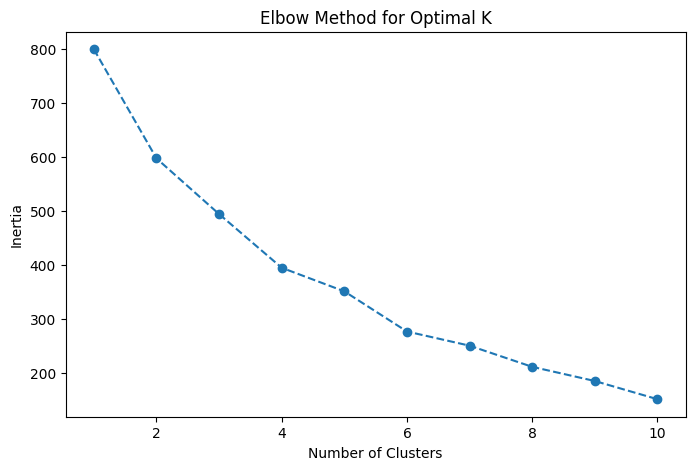

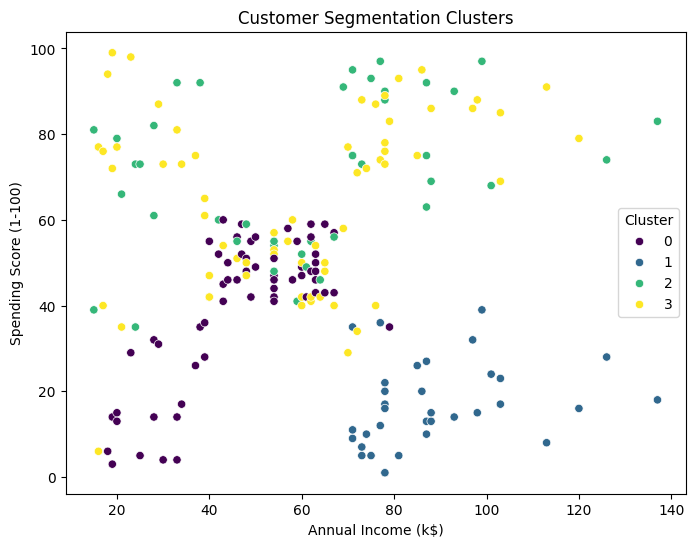

Clustered dataset saved as mall_customer_clusters.csv


In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
file_path = "/content/Mall_Customers.csv"
df = pd.read_csv(file_path)

# Display dataset info
print("Dataset Preview:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# Handle missing values (if any)
df = df.dropna()

# Encode categorical columns (if present)
if 'Gender' in df.columns:
    label_encoder = LabelEncoder()
    df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Convert Male/Female to 0/1

# Select relevant numerical features for clustering
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']  # Modify if needed
df_selected = df[features]

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Find optimal clusters using Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# Apply K-Means clustering
optimal_k = 4  # Choose based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize clusters using Spending Score vs Annual Income
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=df["Cluster"], palette="viridis")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation Clusters")
plt.legend(title="Cluster")
plt.show()

# Save the clustered dataset
df.to_csv("/content/mall_customer_clusters.csv", index=False)
print("Clustered dataset saved as mall_customer_clusters.csv")
